# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sinasc_RO = pd.read_csv('b1abb33c4f.csv')
sinasc_RO.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [26]:
#Verifica se há dados faltantes e calcula a porcentagem
(sinasc_RO.isnull().sum() / len(sinasc_RO)) * 100

ORIGEM        0.000000
CODESTAB      0.425485
CODMUNNASC    0.000000
LOCNASC       0.000000
IDADEMAE      0.000000
                ...   
munResUf      0.000000
munResLat     0.003700
munResLon     0.003700
munResAlt     0.003700
munResArea    0.003700
Length: 69, dtype: float64

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [27]:
#Verifica o tipo de cada variável
sinasc_RO[['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE']].dtypes

APGAR1       float64
APGAR5       float64
SEXO          object
GESTACAO      object
ESTCIVMAE    float64
dtype: object

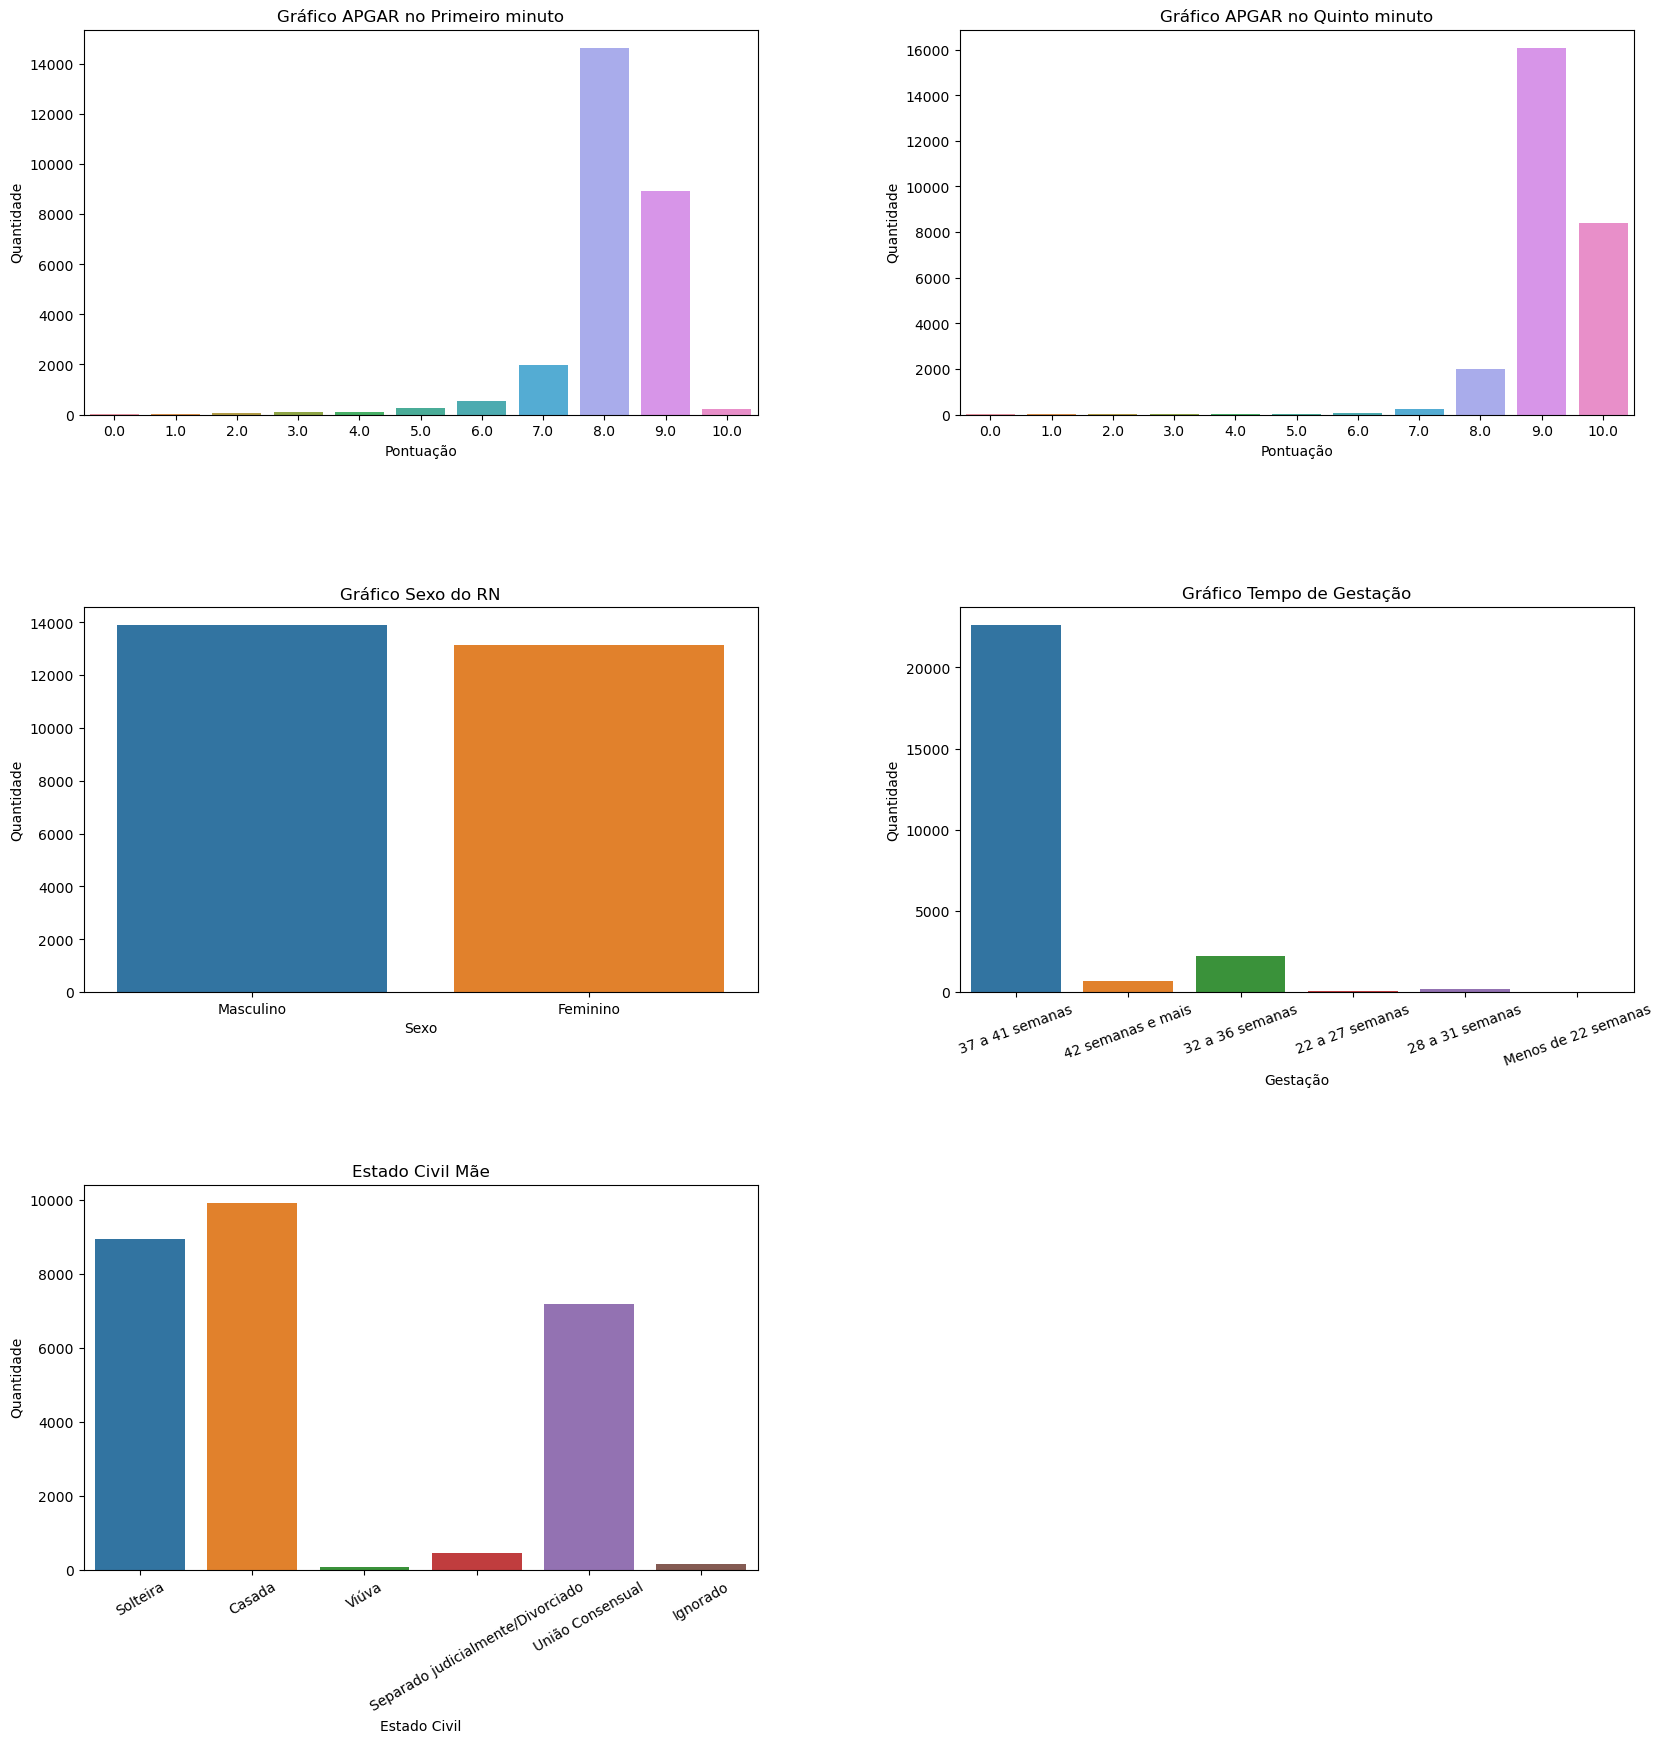

In [153]:
plt.rc('figure', figsize=(20, 20))
fig, axes = plt.subplots(3, 2)
plt.subplots_adjust(wspace=0.3, hspace=0.5)

apgar1 = sns.countplot(ax = axes[0,0], x = 'APGAR1', data = sinasc_RO)
apgar1.set_title('Gráfico APGAR no Primeiro minuto')
apgar1.set_xlabel('Pontuação')
apgar1.set_ylabel('Quantidade')

apgar5 = sns.countplot(ax = axes[0,1], x = 'APGAR5', data = sinasc_RO)
apgar5.set_title('Gráfico APGAR no Quinto minuto')
apgar5.set_xlabel('Pontuação')
apgar5.set_ylabel('Quantidade')

sexo = sns.countplot(ax = axes[1,0], x = 'SEXO', data = sinasc_RO)
sexo.set_title('Gráfico Sexo do RN')
sexo.set_xlabel('Sexo')
sexo.set_ylabel('Quantidade')

gestacao = sns.countplot(ax = axes[1,1], x = 'GESTACAO', data = sinasc_RO)
gestacao.tick_params(axis = 'x',  rotation = 20)
gestacao.set_title('Gráfico Tempo de Gestação')
gestacao.set_xlabel('Gestação')
gestacao.set_ylabel('Quantidade')

estcimae = sns.countplot(ax = axes[2,0], x = 'ESTCIVMAE', data = sinasc_RO)
estcimae.set_xticklabels(['Solteira', 'Casada', 'Viúva', 'Separado judicialmente/Divorciado', 'União Consensual', 'Ignorado'],
                            rotation=30)
estcimae.set_title('Estado Civil Mãe')
estcimae.set_xlabel('Estado Civil')
estcimae.set_ylabel('Quantidade')

fig.delaxes(axes[2,1])

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

Text(0.5, 1.0, 'APGAR5 médio por CONSULTAS')

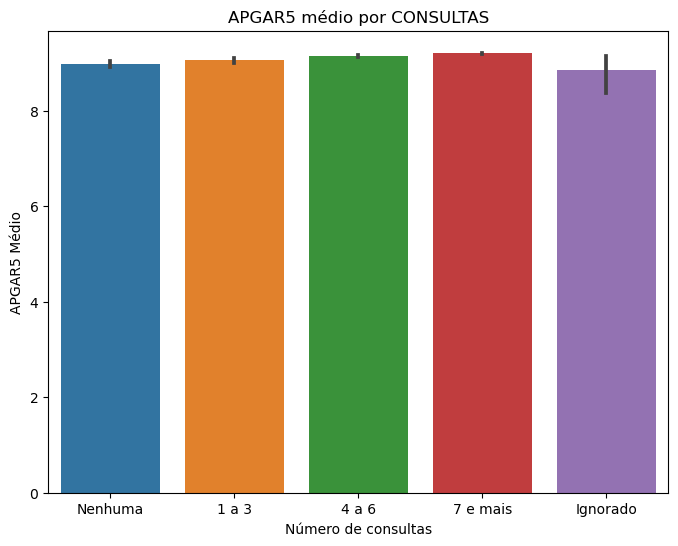

In [136]:
plt.rc('figure', figsize=(8, 6))
fig, axes = plt.subplots()
apgar_medio = sns.barplot(x = 'CONSULTAS', y = 'APGAR5', data = sinasc_RO)
apgar_medio.set_xticklabels(['Nenhuma', '1 a 3', '4 a 6', '7 e mais', 'Ignorado'])
apgar_medio.set_xlabel('Número de consultas')
apgar_medio.set_ylabel('APGAR5 Médio')
apgar_medio.set_title('APGAR5 médio por CONSULTAS')

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

Text(0.5, 1.0, 'Gráfico número Consultas')

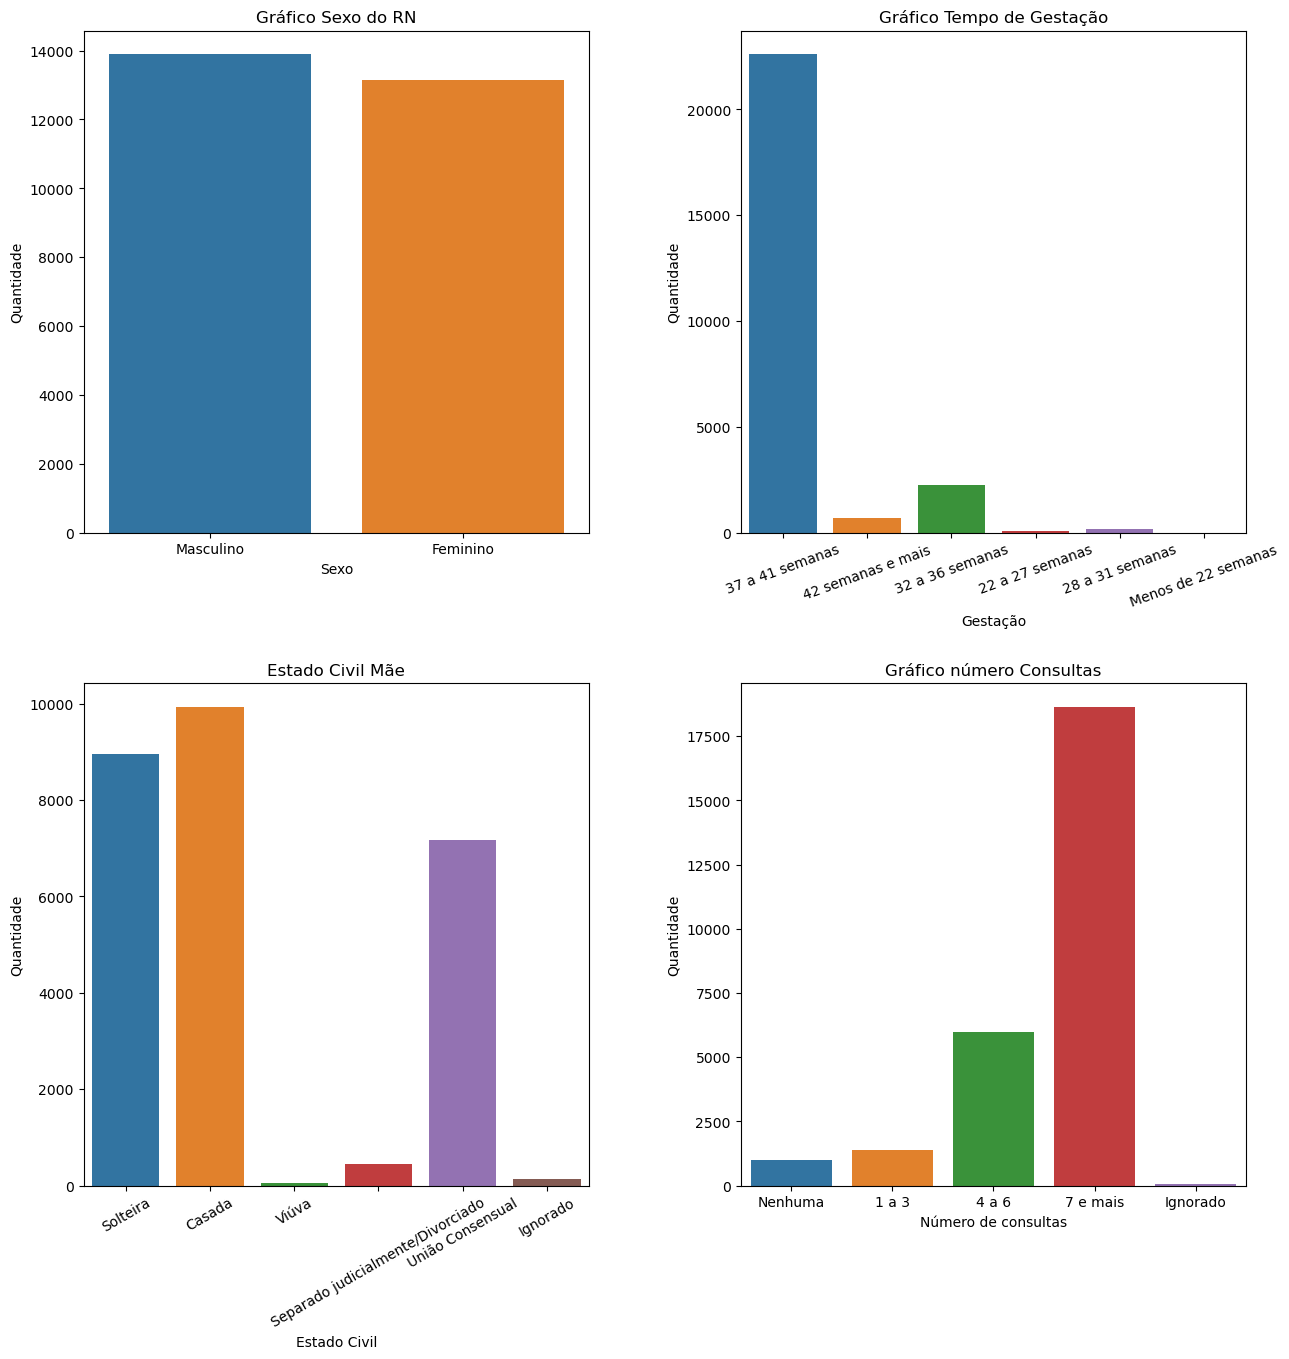

In [152]:
plt.rc('figure', figsize=(15, 15))
fig, axes = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

sexo = sns.countplot(ax = axes[0,0], x = 'SEXO', data = sinasc_RO)
sexo.set_title('Gráfico Sexo do RN')
sexo.set_xlabel('Sexo')
sexo.set_ylabel('Quantidade')

gestacao = sns.countplot(ax = axes[0,1], x = 'GESTACAO', data = sinasc_RO)
gestacao.tick_params(axis = 'x',  rotation = 20)
gestacao.set_title('Gráfico Tempo de Gestação')
gestacao.set_xlabel('Gestação')
gestacao.set_ylabel('Quantidade')

estcimae = sns.countplot(ax = axes[1,0], x = 'ESTCIVMAE', data = sinasc_RO)
estcimae.set_xticklabels(['Solteira', 'Casada', 'Viúva', 'Separado judicialmente/Divorciado', 'União Consensual', 'Ignorado'],
                            rotation=30)
estcimae.set_title('Estado Civil Mãe')
estcimae.set_xlabel('Estado Civil')
estcimae.set_ylabel('Quantidade')

apgar_medio = sns.countplot(ax = axes[1,1], x = 'CONSULTAS', data = sinasc_RO)
apgar_medio.set_xticklabels(['Nenhuma', '1 a 3', '4 a 6', '7 e mais', 'Ignorado'])
apgar_medio.set_xlabel('Número de consultas')
apgar_medio.set_ylabel('Quantidade')
apgar_medio.set_title('Gráfico número Consultas')